1. Suppose you wish to study the effect of different food supplements (feed) on the weights of the chicken (weight).

(a) (5) Use boxplots and a plot of means to visualize the difference between feed types.

(b) (5) Test for the assumptions required for the analysis of variance.

(c) (5) Perform an appropriate version of the ANOVA to compare the effectiveness of different feeds.

(d) (10) If ANOVA shows a difference in the group means, perform post-hoc analysis to identify the feed that results
in the highest weight gain for the chicken.

In [ ]:
import pandas as pd
data=pd.read_excel('Assignment3Data.xlsx',sheet_name='Q1')
data

,Weight,feed
0,179,horsebean
1,160,horsebean
2,136,horsebean
3,227,horsebean
4,217,horsebean
...,...,...
66,359,casein
67,216,casein
68,222,casein
69,283,casein


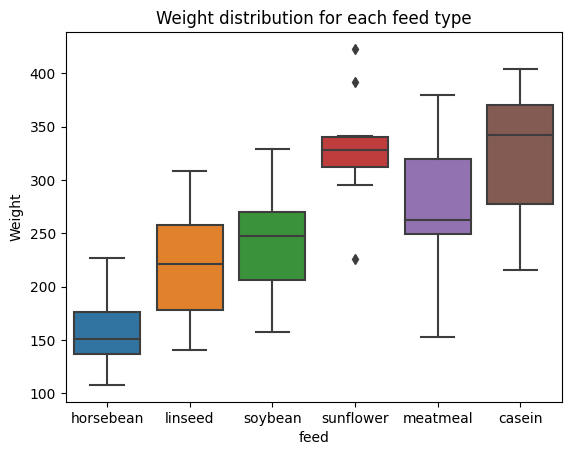

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x=data['feed'],y=data['Weight'])
plt.title('Weight distribution for each feed type')

plt.show()

<ipython-input-3-7872e717bb8b>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='feed', y='Weight', data=data, ci=None, estimator=lambda x: sum(x) / len(x))


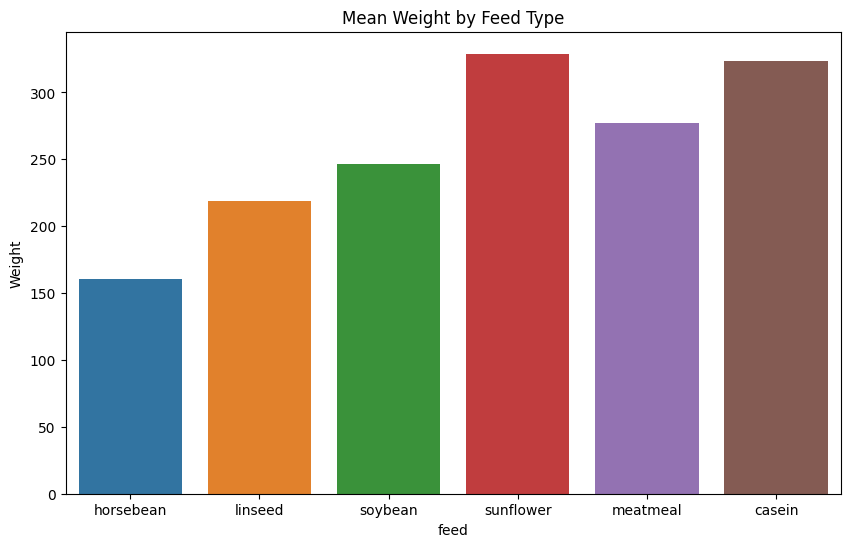

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='feed', y='Weight', data=data, ci=None, estimator=lambda x: sum(x) / len(x))
plt.title('Mean Weight by Feed Type')
plt.show()

In [ ]:
#Levene's test for homogeneity of variances
from scipy import stats

stat, p_value = stats.levene(*[data[data['feed'] == feed_type]['Weight'] for feed_type in data['feed'].unique()])
print(f"Levene's Test: p-value = {p_value:.4f}")

if p_value > 0.05:
    print("We do not reject the null hypothesis")
else:
    print("Reject the Null Hypothesis")

Levene's Test: p-value = 0.5896
We do not reject the null hypothesis


In [ ]:
# (c) Perform ANOVA
#H0 (null hypothesis): μ1 = μ2 = μ3 = … = μk (It implies that the means of all the population are equal)
#H1 (null hypothesis): It states that there will be at least one population mean that differs from the rest



from statsmodels.formula.api import ols
import statsmodels.api as sm

anova_Weight = stats.f_oneway(*[data[data['feed'] == feed_type]['Weight'] for feed_type in data['feed'].unique()])
print('\nANOVA for weight:')
print('F-statistic:', anova_Weight.statistic)
print('p-value:', anova_Weight.pvalue)



ANOVA for weight:
F-statistic: 15.364799774712534
p-value: 5.936419853471331e-10


In [ ]:
# (d) If ANOVA shows a difference, perform post-hoc analysis (Tukey's HSD)
from statsmodels.stats.multicomp import pairwise_tukeyhsd

if anova_Weight.pvalue < 0.05:
    print(f"The P value is ={anova_Weight.pvalue} < 0.05. So H0 can be rejected")

    tukey_result = pairwise_tukeyhsd(data['Weight'], data['feed'])
    print("\nTukey's HSD Post-hoc Test:")
    print(tukey_result)
else:
  print(f"The P value is ={anova_Weight.pvalue} < 0.05. So H0 cannot be rejected")



The P value is =5.936419853471331e-10 < 0.05. So H0 can be rejected

Tukey's HSD Post-hoc Test:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1    group2   meandiff p-adj    lower    upper   reject
--------------------------------------------------------------
   casein horsebean -163.3833    0.0 -232.3469 -94.4198   True
   casein   linseed -104.8333 0.0002 -170.5875 -39.0792   True
   casein  meatmeal  -46.6742 0.3325 -113.9062  20.5577  False
   casein   soybean  -77.1548 0.0084 -140.5171 -13.7925   True
   casein sunflower    5.3333 0.9999  -60.4208  71.0875  False
horsebean   linseed     58.55 0.1413  -10.4135 127.5135  False
horsebean  meatmeal  116.7091 0.0001   46.3351 187.0831   True
horsebean   soybean   86.2286 0.0042   19.5417 152.9155   True
horsebean sunflower  168.7167    0.0   99.7531 237.6802   True
  linseed  meatmeal   58.1591 0.1277   -9.0729 125.3911  False
  linseed   soybean   27.6786 0.7933  -35.6837  91.0409  False
  linseed sunflower  1

In [ ]:
"""
In this case, "horsebean" has the highest mean difference in weight gain compared to several
other feeds.

The largest mean difference is between "horsebean" and "sunflower"
(mean difference = 168.72, p < 0.05)

"""

'In this case, "horsebean" has the highest mean difference in weight gain compared to several\nother feeds.\n\nThe largest mean difference is between "horsebean" and "sunflower"\n(mean difference = 168.72, p < 0.05)\n\n'

2. Cushing’s syndrome is a hypertensive disorder that has been shown to be associated with a higher amount of cortisol
secretion by the adrenal gland. In the data for this question, the observations are urinary excretion rates (mg/24hr) of
two steroid metabolites Pregnanetriol and Tetrahydrocortisone. Based on some experiments it has been hypothe-
sized that the excretion rate of Pregnanetriol changes based on the underlying type (coded a (adenoma), b (bilateral
hyperplasia), c (carcinoma) or u for unknown) of Cushing’s syndrome.

(a) (5) Use boxplots and a plot of means to visualize the difference between excretion rates of the two steroid
metabolites for different Cushing’s type.

(b) (5) Test for the assumptions required for the analysis of variance.

(c) (5) Perform an appropriate version of the ANOVA to compare Pregnanetriol secretion rates in different syndrome
types.

(d) (5) Perform an appropriate version of the ANOVA to compare Tetrahydrocortisone secretion rates in different
syndrome types.

(e) (10) If ANOVA shows a difference in the group means in the last two questions, perform a post-hoc analysis for
each.

In [ ]:
data1=pd.read_excel('Assignment3Data.xlsx',sheet_name='Q2')
data1

,Tetrahydrocortisone,Pregnanetriol,Type
0,3.1,11.70,a
1,3.0,1.30,a
2,1.9,0.10,a
3,3.8,0.04,a
4,4.1,1.10,a
5,1.9,0.40,a
6,8.3,1.00,b
7,3.8,0.20,b
8,3.9,0.60,b
9,7.8,1.20,b


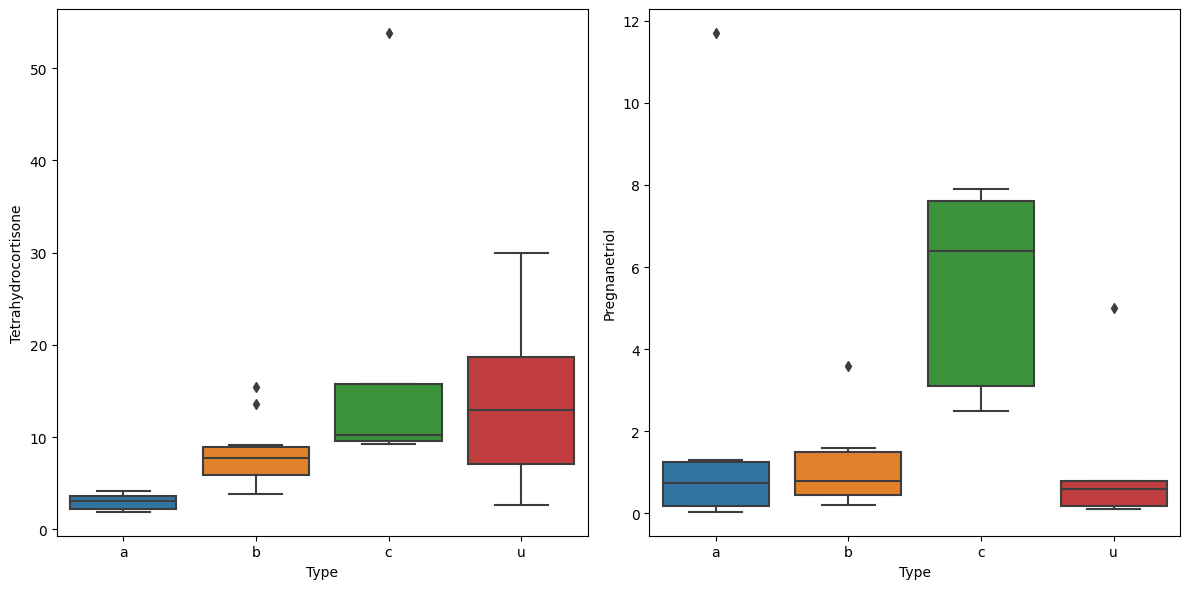

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)


sns.boxplot(x=data1['Type'],y=data1['Tetrahydrocortisone'])

plt.subplot(1, 2, 2)
sns.boxplot(y=data1['Pregnanetriol'],x=data1['Type'])
plt.tight_layout()

plt.show()

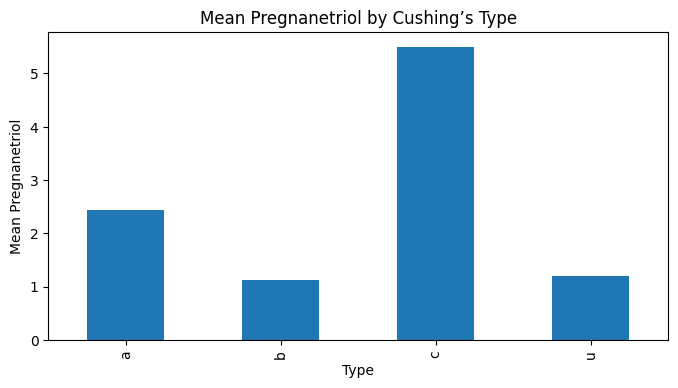

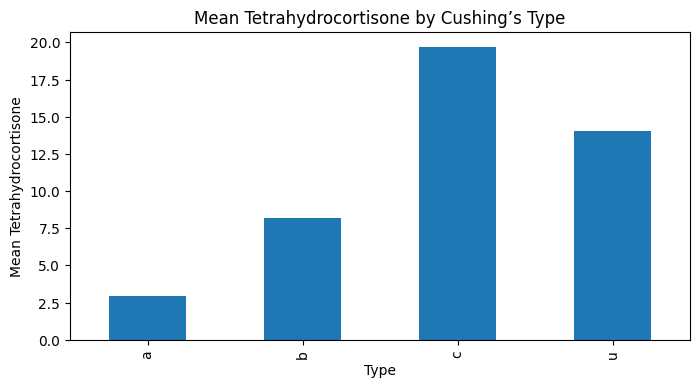

In [ ]:
# Plot of means for Pregnanetriol by Type
plt.figure(figsize=(8, 4))
means_pregnanetriol = data1.groupby('Type')['Pregnanetriol'].mean()
means_pregnanetriol.plot(kind='bar')
plt.xlabel('Type')
plt.ylabel('Mean Pregnanetriol')
plt.title('Mean Pregnanetriol by Cushing’s Type')
plt.show()

# Plot of means for Tetrahydrocortisone by Type
plt.figure(figsize=(8, 4))
means_tetrahydrocortisone = data1.groupby('Type')['Tetrahydrocortisone'].mean()
means_tetrahydrocortisone.plot(kind='bar')
plt.xlabel('Type')
plt.ylabel('Mean Tetrahydrocortisone')
plt.title('Mean Tetrahydrocortisone by Cushing’s Type')
plt.show()

In [ ]:
from scipy.stats import  levene


# Assumption: Levene's test for homogeneity of variances
levene_test_pregnanetriol = levene(data1['Pregnanetriol'][data1['Type'] == 'a'],
                                   data1['Pregnanetriol'][data1['Type'] == 'b'],
                                   data1['Pregnanetriol'][data1['Type'] == 'c'],
                                   data1['Pregnanetriol'][data1['Type'] == 'u'])[1]

levene_test_tetrahydrocortisone = levene(data1['Tetrahydrocortisone'][data1['Type'] == 'a'],
                                         data1['Tetrahydrocortisone'][data1['Type'] == 'b'],
                                         data1['Tetrahydrocortisone'][data1['Type'] == 'c'],
                                         data1['Tetrahydrocortisone'][data1['Type'] == 'u'])[1]

print(f'Levene\'s test for homogeneity of variances (Pregnanetriol): p-value = {levene_test_pregnanetriol:.4f}')
print(f'Levene\'s test for homogeneity of variances (Tetrahydrocortisone): p-value = {levene_test_tetrahydrocortisone:.4f}')





Levene's test for homogeneity of variances (Pregnanetriol): p-value = 0.5196
Levene's test for homogeneity of variances (Tetrahydrocortisone): p-value = 0.2505


In [ ]:
# (c) Perform ANOVA for Pregnanetriol
#H0 (null hypothesis): μ1 = μ2 = μ3 = … = μk (It implies that the means of all the population are equal)
#H1 (null hypothesis): It states that there will be at least one population mean that differs from the rest

anova_pregnanetriol = stats.f_oneway(data1['Pregnanetriol'][data1['Type'] == 'a'],
                               data1['Pregnanetriol'][data1['Type'] == 'b'],
                               data1['Pregnanetriol'][data1['Type'] == 'c'],
                               data1['Pregnanetriol'][data1['Type'] == 'u'])

print('\nANOVA for Pregnanetriol:')
print('F-statistic:', anova_pregnanetriol.statistic)
print('p-value:', anova_pregnanetriol.pvalue)




ANOVA for Pregnanetriol:
F-statistic: 3.5392626216260634
p-value: 0.030507062483867444


In [ ]:
# (d) Perform ANOVA for Tetrahydrocortisone
anova_tetrahydrocortisone = stats.f_oneway(data1['Tetrahydrocortisone'][data1['Type'] == 'a'],
                                     data1['Tetrahydrocortisone'][data1['Type'] == 'b'],
                                     data1['Tetrahydrocortisone'][data1['Type'] == 'c'],
                                     data1['Tetrahydrocortisone'][data1['Type'] == 'u'])

print('\nANOVA for Tetrahydrocortisone:')
print('F-statistic:', anova_tetrahydrocortisone.statistic)
print('p-value:', anova_tetrahydrocortisone.pvalue)




ANOVA for Tetrahydrocortisone:
F-statistic: 3.2257394791378426
p-value: 0.0412182793672776


In [ ]:
# (e) Perform post-hoc analysis
# Post-hoc analysis for Pregnanetriol
if anova_pregnanetriol.pvalue < 0.05:
    print(f"The P value is ={anova_pregnanetriol.pvalue} < 0.05. So H0 can be rejected")

    tukey_pregnanetriol = pairwise_tukeyhsd(endog=data1['Pregnanetriol'], groups=data1['Type'], alpha=0.05)
    print('\nPost-hoc analysis for Pregnanetriol:')
    print(tukey_pregnanetriol.summary())
else:
    print(f"The P value is ={anova_pregnanetriol.pvalue} < 0.05. So H0 can be rejected")

# Post-hoc analysis for Tetrahydrocortisone

if anova_tetrahydrocortisone.pvalue < 0.05:
    print(f"The P value is ={anova_tetrahydrocortisone.pvalue} < 0.05. So H0 can be rejected")

    tukey_tetrahydrocortisone = pairwise_tukeyhsd(endog=data1['Tetrahydrocortisone'], groups=data1['Type'], alpha=0.05)
    print('\nPost-hoc analysis for Tetrahydrocortisone:')
    print(tukey_tetrahydrocortisone.summary())
else:
    print(f"The P value is ={anova_tetrahydrocortisone.pvalue} < 0.05. So H0 can be rejected")


The P value is =0.030507062483867444 < 0.05. So H0 can be rejected

Post-hoc analysis for Pregnanetriol:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     a      b    -1.32 0.7627 -5.0519 2.4119  False
     a      c     3.06 0.2416  -1.316  7.436  False
     a      u    -1.24 0.8433 -5.4124 2.9324  False
     b      c     4.38 0.0264  0.4217 8.3383   True
     b      u     0.08 0.9999 -3.6519 3.8119  False
     c      u     -4.3 0.0553  -8.676  0.076  False
---------------------------------------------------
The P value is =0.0412182793672776 < 0.05. So H0 can be rejected

Post-hoc analysis for Tetrahydrocortisone:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     a      b   5.2133  0.722 -8.5182 18.9448  False
     a      c  16.7533 0.0394  0.6517  32.855   True
 

3. Anorexia is characterized by an unwarranted fear of being overweight. Its symptoms include attempts to maintain
a below-normal weight through various means. In the data for this question, the weights (in lbs) of the subjects are
listed before (PreWt) and after (PostWt) a couple of treatment methodologies (Cognitive Behavioural treatment CBT
and family treatment FT) along with a control (Cont) group where no treatment was given.

(a) (5) Use boxplots and a plot of means to visualize the difference between different groups.


(b) (5) Calculate the difference in body weight for each subject.

(c) (5) Test for the assumptions required for the analysis of variance.

(d) (10) Perform ANOVA and post-hoc analysis and comment on the effectiveness of the therapies.

In [ ]:
data3=pd.read_excel('Assignment3Data.xlsx',sheet_name='Q3')
data3

,Treatment,PreWt,PostWt
0,Cont,80.7,80.2
1,Cont,89.4,80.1
2,Cont,91.8,86.4
3,Cont,74.0,86.3
4,Cont,78.1,76.1
...,...,...,...
67,FT,77.6,90.7
68,FT,83.5,92.5
69,FT,89.9,93.8
70,FT,86.0,91.7


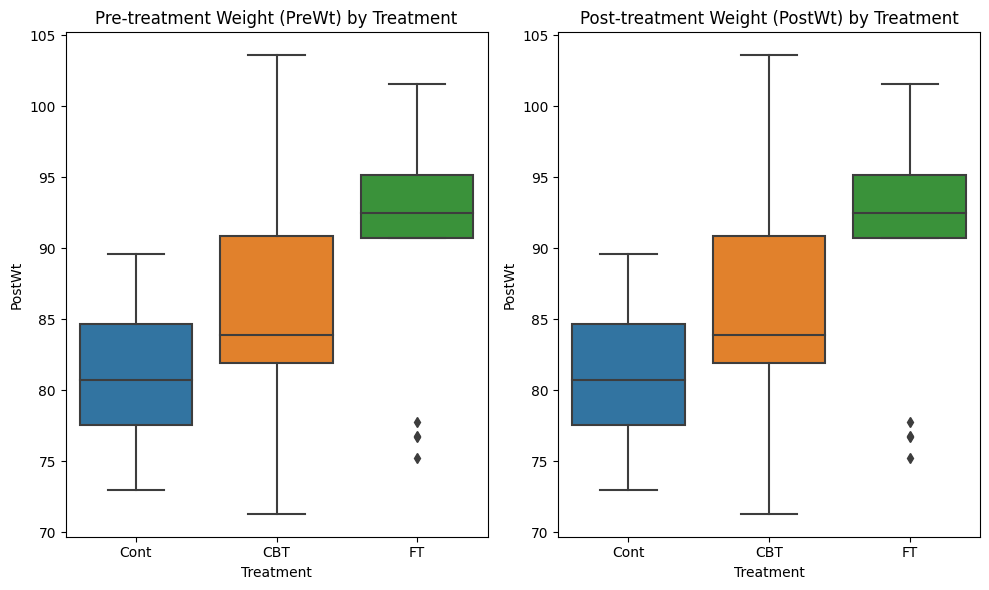

In [ ]:
# (a) Visualize the data using boxplots and a plot of means

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Treatment', y='PostWt', data=data3)
plt.title('Pre-treatment Weight (PreWt) by Treatment')

plt.subplot(1, 2, 2)
sns.boxplot(x='Treatment', y='PostWt', data=data3)
plt.title('Post-treatment Weight (PostWt) by Treatment')

plt.tight_layout()
plt.show()


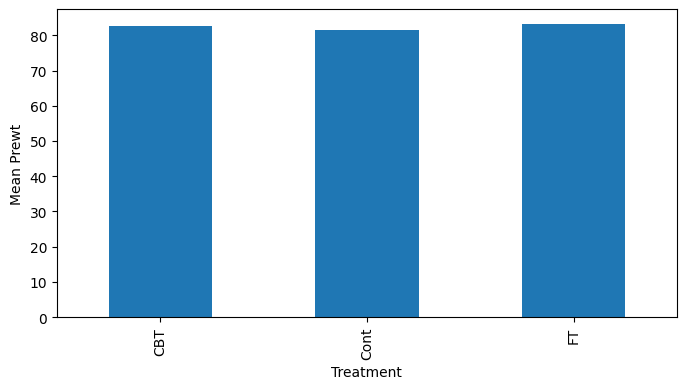

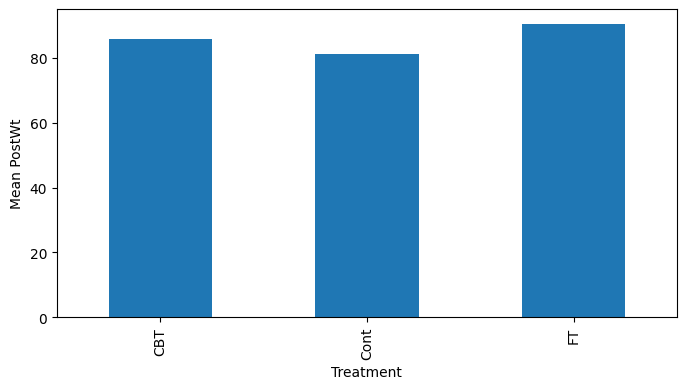

In [ ]:
# Plot of means for Pregnanetriol by Type
plt.figure(figsize=(8, 4))
means_prewt= data3.groupby('Treatment')['PreWt'].mean()
means_prewt.plot(kind='bar')
plt.xlabel('Treatment')
plt.ylabel('Mean Prewt')

plt.show()

# Plot of means for Tetrahydrocortisone by Type
plt.figure(figsize=(8, 4))
means_postwt = data3.groupby('Treatment')['PostWt'].mean()
means_postwt.plot(kind='bar')
plt.xlabel('Treatment')
plt.ylabel('Mean PostWt')
plt.show()

In [ ]:
# (b) Calculate the difference in body weight for each subject
data3['WeightDiff'] = data3['PostWt'] - data3['PreWt']
data3


,Treatment,PreWt,PostWt,WeightDiff
0,Cont,80.7,80.2,-0.5
1,Cont,89.4,80.1,-9.3
2,Cont,91.8,86.4,-5.4
3,Cont,74.0,86.3,12.3
4,Cont,78.1,76.1,-2.0
...,...,...,...,...
67,FT,77.6,90.7,13.1
68,FT,83.5,92.5,9.0
69,FT,89.9,93.8,3.9
70,FT,86.0,91.7,5.7


In [ ]:
#(c) Assumption : Levene's test for homogeneity of variances
levene_test = levene(data3['WeightDiff'][data3['Treatment'] == 'Cont'],
                     data3['WeightDiff'][data3['Treatment'] == 'CBT'],
                     data3['WeightDiff'][data3['Treatment'] == 'FT'])[1]

print(f'\nLevene\'s test for homogeneity of variances (WeightDiff): p-value = {levene_test:.4f}')




Levene's test for homogeneity of variances (WeightDiff): p-value = 0.5964


In [ ]:
# (d) Perform ANOVA and post-hoc analysis

#H0 (null hypothesis): μ1 = μ2 = μ3 = … = μk (It implies that the means of all the population are equal)
#H1 (null hypothesis): It states that there will be at least one population mean that differs from the rest

anova_result = stats.f_oneway(data3['WeightDiff'][data3['Treatment'] == 'Cont'],
                        data3['WeightDiff'][data3['Treatment'] == 'CBT'],
                        data3['WeightDiff'][data3['Treatment'] == 'FT'])

print('\nANOVA for WeightDiff:')
print('F-statistic:', anova_result.statistic)
print('p-value:', anova_result.pvalue)

# Post-hoc analysis
tukey = pairwise_tukeyhsd(endog=data3['WeightDiff'], groups=data3['Treatment'], alpha=0.05)
print('\nPost-hoc analysis:')
print(tukey.summary())
print('\nPairwise comparisons:')
print(tukey.groupsunique)
print(tukey.meandiffs)
print(tukey.pvalues)



ANOVA for WeightDiff:
F-statistic: 5.422296868238266
p-value: 0.006498652980699739

Post-hoc analysis:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   CBT   Cont  -3.4569 0.2124 -8.3273  1.4135  False
   CBT     FT   4.2578 0.1607 -1.2506  9.7662  False
  Cont     FT   7.7147 0.0045  2.0901 13.3393   True
----------------------------------------------------

Pairwise comparisons:
['CBT' 'Cont' 'FT']
[-3.45689655  4.25780933  7.71470588]
[0.21244284 0.16074613 0.00451275]


### CBT vs. Cont (Control):

Mean Difference: -3.4569

p-value: 0.2124

Result: Not statistically significant (p > 0.05)

Interpretation: There is no statistically significant difference in effectiveness between Cognitive Behavioral Therapy (CBT) and the Control group.

### CBT vs. FT (First Therapy):

Mean Difference: 4.2578

p-value: 0.1607

Result: Not statistically significant (p > 0.05)

Interpretation: There is no statistically significant difference in effectiveness between Cognitive Behavioral Therapy (CBT) and the First Therapy (FT).

###Cont (Control) vs. FT (First Therapy):

Mean Difference: 7.7147

p-value: 0.0045

Result: Statistically significant (p ≤ 0.05)

Interpretation: There is a statistically significant difference in effectiveness between the Control group and the First Therapy (FT). FT appears to be more effective compared to the Control group.

### Overall Interpretation:
The First Therapy (FT) shows a statistically significant higher effectiveness compared to the Control group (Cont).
However, there is no statistically significant difference in effectiveness observed between Cognitive Behavioral Therapy (CBT) and both the Control group (Cont) and the First Therapy (FT).


4. (20) Suppose you are designing an experiment to study the effect of a nano-particle-based drug delivery method. For
this, you have planned to synthesize Poly (lactic-co-glycolic acid) (PLGA) nanoparticles, Poly-lactic acid nanoparticles,
and gold nanoparticles. For a comparison of the effectiveness of the delivery method, you also plan to administer the
drug without loading it into the nanoparticles. In experiments, you intend to measure the number of cells after 4 hours
of drug administration using different delivery modes. From some preliminary observations, you have seen that the
variance in the cell numbers is 1000. What should be your sample sizes to achieve a statistical power of 80% at 0.05
level of significance if you want to detect a difference of 100 cells?

In [ ]:
import statsmodels.stats.api as sms

variance = 1000  # Variance in cell numbers
effect_size = 100  # Difference in means
alpha = 0.05  # Significance level
power = 0.80  # Desired power

n=sms.tt_ind_solve_power(effect_size=effect_size, nobs1=None, alpha=alpha, power=power, ratio=1.0, alternative='two-sided')

print("Sample size for alpha = 0.05:", n)


Sample size for alpha = 0.05: [10.]


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/power.py:525: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, ConvergenceWarning)


In [ ]:
"""from statsmodels.stats.power import tt_ind_solve_power

# Given values
effect_size = 100  # Difference in means (effect size in cells)
alpha = 0.05  # Significance level
power = 0.8  # Desired statistical power
variance = 1000  # Variance in cell numbers

# Calculate the required sample sizes using tt_ind_solve_power
sample_size_per_group = tt_ind_solve_power(effect_size=effect_size,
                                           alpha=alpha,
                                           power=power,
                                           ratio=1,  # We assume equal sample sizes for simplicity
                                           alternative='two-sided')

# Total sample size (assuming equal sample sizes for both groups)
total_sample_size = 2 * sample_size_per_group

print(f"Required sample size per group: {sample_size_per_group}")
print(f"Total sample size for both groups: {total_sample_size}")
"""

'from statsmodels.stats.power import tt_ind_solve_power\n\n# Given values\neffect_size = 100  # Difference in means (effect size in cells)\nalpha = 0.05  # Significance level\npower = 0.8  # Desired statistical power\nvariance = 1000  # Variance in cell numbers\n\n# Calculate the required sample sizes using tt_ind_solve_power\nsample_size_per_group = tt_ind_solve_power(effect_size=effect_size,\n                                           alpha=alpha,\n                                           power=power,\n                                           ratio=1,  # We assume equal sample sizes for simplicity\n                                           alternative=\'two-sided\')\n\n# Total sample size (assuming equal sample sizes for both groups)\ntotal_sample_size = 2 * sample_size_per_group\n\nprint(f"Required sample size per group: {sample_size_per_group}")\nprint(f"Total sample size for both groups: {total_sample_size}")\n'

In [ ]:
pip install h5py


In [ ]:
import h5py

# Replace 'your_file.h5' with the actual path to your .h5 file
with h5py.File('teja.h5', 'r') as file:
    # Access the dataset(s) within the file
    dataset = file['/84:FD:27:E9:9C:B4/raw/channel_1']  # Replace 'dataset_name' with the actual dataset name

    # Retrieve the data from the dataset
    data = dataset[()]  # This loads the entire dataset into a variable


In [ ]:
len(data)

62700

In [ ]:
import numpy as np

time = np.arange(len(data))

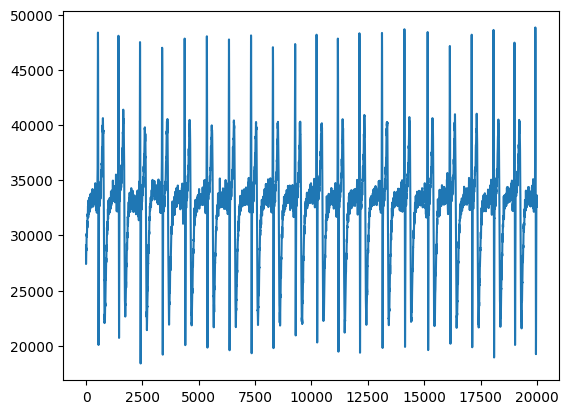

In [ ]:
plt.plot(time[:20000],data[:20000])
plt.show()

In [ ]:
data[:10]

array([[29088],
       [27408],
       [27520],
       [27744],
       [27920],
       [28032],
       [28224],
       [28480],
       [28688],
       [28736]], dtype=uint32)